In [1]:
pip install "gym==0.19.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663118 sha256=a67e714498b95dd54e081f9c5783d13eb807591a7f36adc8307783c151f0ecef
  Stored in directory: /root/.cache/pip/wheels/ef/9d/70/8bea53f7edec2fdb4f98d9d64ac9f11aea95dfcb98099d7712
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [2]:
pip install stable-baselines[mpi]==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 4.9 MB/s 
     |████████████████████████████████| 2.5 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.8 MB 31.4 MB/s 
     |████████████████████████████████| 966 kB 44.1 MB/s 
Reason for being yanked: re-release with new wheels
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp37-cp37m-linux_x86_64.whl size=2185738 sha256=e621b8352b2a47401f1e6337fc63508e53499adb7bcb647512691a46311913ff
  Stored in directory: /root/.cache/pip/wheels/99/54/29/187b5768bbb7beeab6753bc30acf56f35bc8ca9c214a31e173
Successfully built mpi4py
  Attempting uninstall: atari-py
    Found existing installation: atari-py 0.2.9
    Uninstalling atari-py-0.2.9:
      Successfully uninstalled atari-py-0.2.9


In [3]:
pip install --upgrade tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 41 kB/s 
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 488 kB 25.7 MB/s 
     |████████████████████████████████| 3.1 MB 26.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [10]:
import random
import pandas as pd
import numpy as np
import datetime
from Environment.WM import WMEnv
import matplotlib.pyplot as plt

from stable_baselines.common.policies import MlpPolicy, CnnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

In [12]:
df = pd.read_csv('Datasets/df.csv')
env = WMEnv(df, 8, 22, 8, 10, 10, 10)
model = PPO2(MlpPolicy, env, verbose = 0) # MlpPolicy
model.learn(total_timesteps = 10000)

In [43]:
date = []
time = []
price = []
en_cost = []
total_en = []

for episode in range(5): 
  s = env.reset()
  while True:
    action, _states = model.predict(s)
    date.append(env.cur_date)
    time.append(env.time)
    price.append(env.price)
    s_, rewards, done, info = env.step(action)
    en_cost.append(env.cur_energy)
    s = s_
    if done:
      total_en.append(env.total_energy_cost)
      break


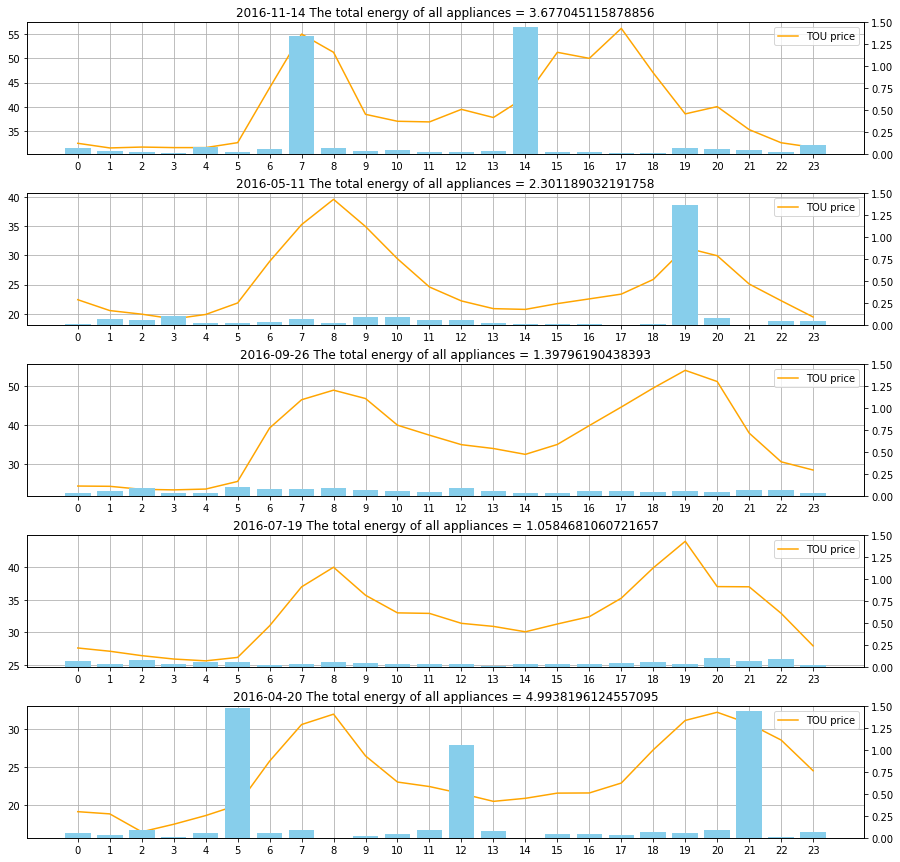

In [44]:
re = pd.DataFrame({'date':date, 't':time, 'energy_cost':en_cost, 'price':price })
d = list(re.date.unique())
fig, axes = plt.subplots(5,1,figsize = (15,15))
plt.subplots_adjust(hspace = 0.3)
for i in range(5):
  axes2 = axes[i].twinx()
  axes[i].plot(re[re.date == d[i]].t, re[re.date == d[i]].price, color = 'orange')
  axes2.bar(re[re.date == d[i]].t, re[re.date == d[i]].energy_cost, color = 'skyblue')
  axes2.set_ylim([0, 1.5])
  axes[i].grid()
  axes[i].title.set_text(d[i] + ' The total energy of all appliances = ' + str(total_en[i]))
  axes[i].legend(['TOU price'])
  plt.xticks(np.arange(0,24))
plt.show()


In [ ]:
PPO2()